# Logistic Regression

## Setup

In [2]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("ML-Regression-Notebooks"):
    raise ValueError("Please change working directory to 'path/Classifying-the-MNIST' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/ML-Regression-Notebooks


In [3]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetch Data

In [5]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [6]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Perform Logit Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [10]:
X.min(), X.max()

(0.1, 2.5)

In [11]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
y_proba.round(3)

array([[0.998, 0.002],
       [0.998, 0.002],
       [0.998, 0.002],
       ...,
       [0.006, 0.994],
       [0.006, 0.994],
       [0.006, 0.994]])

## Decision Boundaries

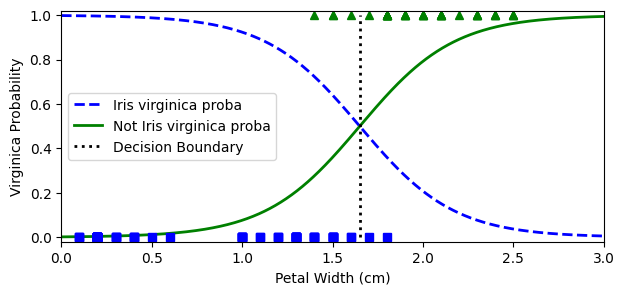

In [12]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(7, 3))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2,
         label="Not Iris virginica proba")
plt.plot((decision_boundary, decision_boundary), (0, 1), "k:", linewidth=2,
         label="Decision Boundary")
plt.axis([0, 3, -0.02, 1.02])

X_virginica, y_virginica = X_train[y_train==1], y_train[y_train==1]
X_non_virginica, y_non_virginica = X_train[y_train==0], y_train[y_train==0]

plt.plot(X_virginica, y_virginica, "g^")
plt.plot(X_non_virginica, y_non_virginica, "bs")

plt.xlabel("Petal Width (cm)")
plt.ylabel("Virginica Probability")

plt.legend()
plt.show()

In [13]:
decision_boundary

1.6516516516516517

In [14]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

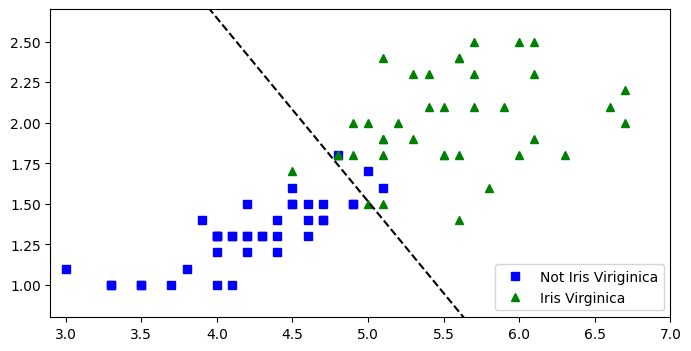

In [46]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

boundary_x = np.array([3, 7])
boundary_y = -((log_reg.coef_[0, 0] * boundary_x + log_reg.intercept_[0]) / log_reg.coef_[0, 1])


plt.figure(figsize=(8, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs", label="Not Iris Viriginica")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^", label="Iris Virginica")
plt.plot(boundary_x, boundary_y, "k--")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.axis([2.9, 7, 0.8, 2.7])
plt.legend()
plt.show()

## Softmax Regression

In [48]:
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [49]:
softmax_reg.predict([[5, 2]])

array([2])

In [52]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

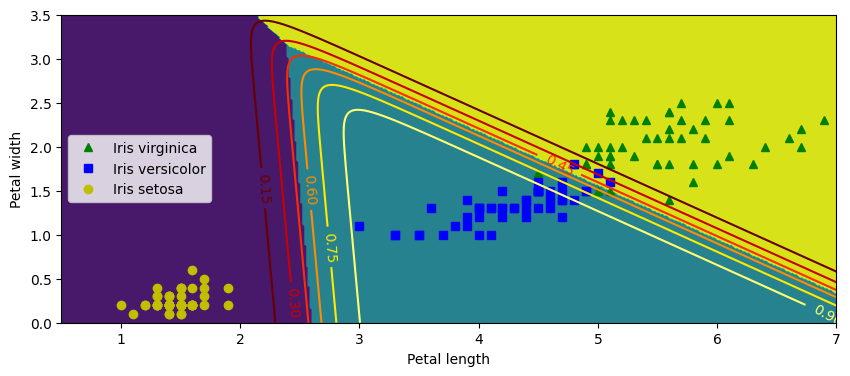

In [54]:

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.show()